In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

       director_name   total_gross
0   Steven Spielberg  4.114233e+09
1        Woody Allen  3.083454e+08
2    Martin Scorsese  9.202871e+08
3     Clint Eastwood  1.378321e+09
4       Ridley Scott  1.337772e+09
5         Tim Burton  2.071275e+09
6  Steven Soderbergh  1.050730e+09
7          Spike Lee  3.285004e+08
8       Renny Harlin  5.239759e+08
9       Oliver Stone  6.797927e+08


<AxesSubplot:>

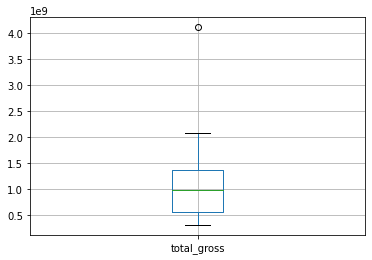

In [5]:
frequency = data['director_name'].value_counts()[1:11]
freq = frequency.keys()
gross_sums = []
final_data= []

#loop to get the gross of all the director's films and summation
for i in range (len(freq)):
    direc = data[data.director_name == freq[i]]
    gross_sum = direc[['gross']].sum().apply(lambda x: '{:.2f}'.format(x))
    gross_sums.append(gross_sum.str.cat(sep='\n'))

#for loop to create a new data set for the top 10 directors
for i in range (len(freq)):
    to_append = [freq[i],gross_sums[i]]
    final_data.append(to_append)

df = pd.DataFrame(final_data, columns=['director_name', 'total_gross'])
df['total_gross']=df['total_gross'].astype(float)
print(df)
df.boxplot()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

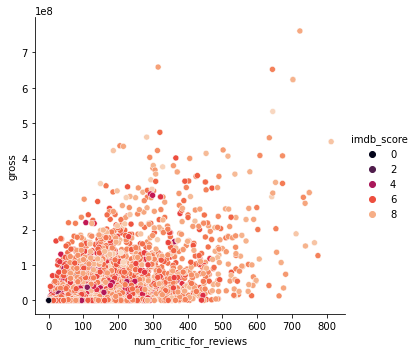

In [18]:

sns.relplot(x="num_critic_for_reviews", y="gross", hue="imdb_score", data=data, palette = "rocket")

## Compute Sales (Gross - Budget), add it as another column

In [7]:
#add new column called 'sales'
data['sales'] = (data['gross'] - data['budget'])
data[['director_name','sales']]

,director_name,sales
0,James Cameron,523505847.0
1,Gore Verbinski,9404152.0
2,Sam Mendes,-44925825.0
3,Christopher Nolan,198130642.0
4,Doug Walker,0.0
...,...,...
5039,0,0.0
5040,Benjamin Roberds,-1400.0
5041,Daniel Hsia,10443.0
5042,Jon Gunn,84122.0


## Which directors garnered the most total sales?

In [8]:
#Sort by sales in descending order
sort_by_sales = data.sort_values(by="sales", ascending = False)
sort_by_sales


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000.0,5.235058e+08
29,29,b'Jurassic World',Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,...,English,USA,PG-13,1.500000e+08,2015.0,2000.0,7.0,2.00,150000.0,5.021773e+08
26,26,b'Titanic',Color,James Cameron,315.0,189.0,0.0,794.0,Kate Winslet,29000.0,...,English,USA,PG-13,2.000000e+08,1997.0,14000.0,7.7,2.35,26000.0,4.586723e+08
3024,3024,b'Star Wars: Episode IV - A New Hope',Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,...,English,USA,PG,1.100000e+07,1977.0,1000.0,8.7,2.35,33000.0,4.499357e+08
3080,3080,b'E.T. the Extra-Terrestrial',Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,...,English,USA,PG,1.050000e+07,1982.0,725.0,7.9,1.85,34000.0,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2334,b'Steamboy',Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,...,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973.0,-2.127110e+09
2323,2323,b'Princess Mononoke',Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,...,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000.0,-2.397702e+09
3005,3005,b'Fateless',Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,...,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607.0,-2.499804e+09
3859,3859,b'Lady Vengeance',Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,...,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000.0,-4.199788e+09


## Plot sales and average likes as a scatterplot. Fit it with a line.

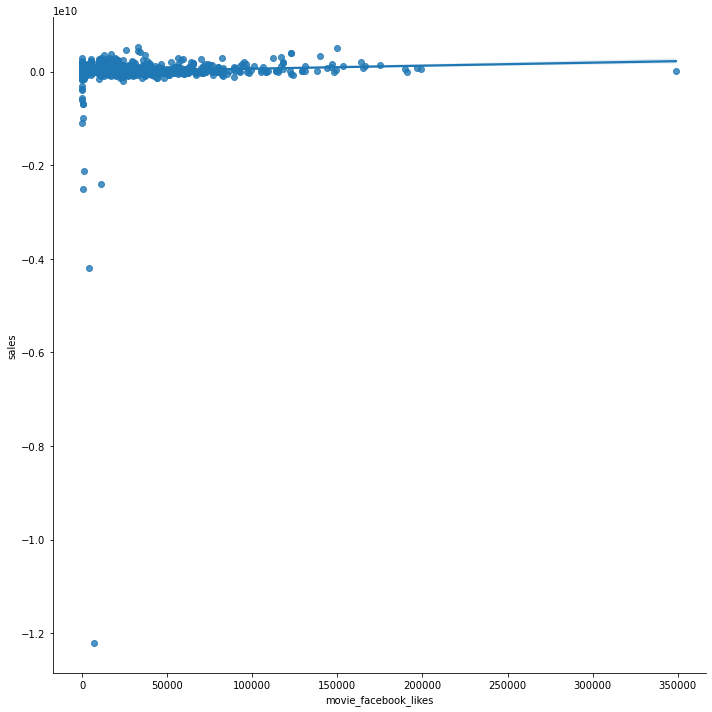

In [9]:
#lmplot for scatterplot with line
sns.lmplot(x= "movie_facebook_likes", 
          y="sales",
           data=data, height=10)


## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

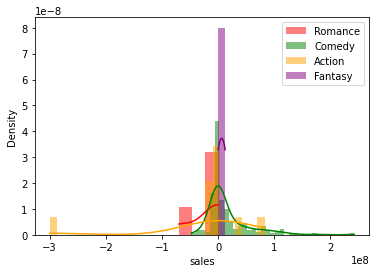

In [10]:
#histogram with diff. genres on the same axis

ax = sns.histplot(data[data['genres'] == 'Romance']['sales'], color="red", label="Romance", kde=True, stat="density", linewidth=0 )
sns.histplot(data[data['genres'] == 'Comedy']['sales'], color="green", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']['sales'], color="orange", label="Action" , kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']['sales'], color="purple", label="Fantasy" , kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()


## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [11]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [12]:
from pandas.api.types import is_numeric_dtype

#for loop to check each column if has numeric values
for column in df:
    if is_numeric_dtype(df[column]):
        max = df[column].max()
        min = df[column].min()
        df[column] = (df[column] - min) / (max-min)
df


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,English,USA,PG-13,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,English,USA,PG-13,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,English,UK,PG-13,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,English,USA,PG-13,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,b'The Following ',Color,0,0.052891,0.227513,0.000000,0.013870,Valorie Curry,0.001314,...,English,USA,TV-14,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898
5040,0.999405,b'A Plague So Pleasant',Color,Benjamin Roberds,0.015990,0.402116,0.000000,0.000000,Maxwell Moody,0.000000,...,English,USA,0,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898
5041,0.999603,b'Shanghai Calling',Color,Daniel Hsia,0.017220,0.529101,0.000000,0.021261,Daniel Henney,0.001478,...,English,USA,PG-13,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899
5042,0.999802,b'My Date with Drew',Color,Jon Gunn,0.052891,0.476190,0.000696,0.000696,Brian Herzlinger,0.000134,...,English,USA,PG,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905


# 